# Customer Churn Prediction - Data Exploration


## Customer Churn Prediction Model
### Part 1: Exploratory Data Analysis
**Project Goal:** Build a machine learning model to predict which telecom customers are likely to churn (cancel their service).

**Business Context:** 
 - Customer acquisition costs 5-25x more than retention
 - Telecom industry churn rate: 15-25% annually
 - Early identification enables proactive retention strategies

 **This Notebook:**
 - Load and inspect the dataset
 - Understand customer demographics and service usage
 - Identify patterns and relationships with churn
 - Discover data quality issues
 - Generate insights for feature engineering

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


In [3]:
# Display settings
%matplotlib inline

### 1.1 Load the Dataset

In [4]:
# Load data
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")


✓ Dataset loaded successfully!
Dataset shape: 7,043 rows × 21 columns


### 1.2 First Look at the Data

In [5]:
# Display first few rows
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### 1.3 Dataset Structure

In [6]:
# Get data types and non-null counts
print("Dataset Information:")
print("="*60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

### 1.4 Column Overview

In [7]:
# List all columns with their data types
print("\nColumn Categories:")
print("="*60)

print("\n Customer Demographics:")
demographic_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in demographic_cols:
    if col in df.columns:
        print(f"  • {col}: {df[col].dtype}")


Column Categories:

 Customer Demographics:
  • customerID: object
  • gender: object
  • SeniorCitizen: int64
  • Partner: object
  • Dependents: object


In [8]:
print("\n Services:")
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_cols:
    if col in df.columns:
        print(f"  • {col}: {df[col].dtype}")



 Services:
  • PhoneService: object
  • MultipleLines: object
  • InternetService: object
  • OnlineSecurity: object
  • OnlineBackup: object
  • DeviceProtection: object
  • TechSupport: object
  • StreamingTV: object
  • StreamingMovies: object


In [9]:
print("\nAccount Information:")
account_cols = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 
                'MonthlyCharges', 'TotalCharges']
for col in account_cols:
    if col in df.columns:
        print(f"  • {col}: {df[col].dtype}")


Account Information:
  • tenure: int64
  • Contract: object
  • PaperlessBilling: object
  • PaymentMethod: object
  • MonthlyCharges: float64
  • TotalCharges: object


In [10]:
print("\nTarget Variable:")
print(f"  • Churn: {df['Churn'].dtype}")


Target Variable:
  • Churn: object


## 2 Univariate Analysis
### 2.1 Numerical Features

In [11]:
# Statistical summary of numerical columns
print("Numerical Features Summary")
print("="*60)

df.describe()

Numerical Features Summary


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 2.2 Categorical Features

In [12]:
print("\nCategorical Features Summary:")
print("="*60)
df.describe(include='object')


Categorical Features Summary:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


### 2.3 Target Variable Analysis

#### 2.3.1 Churn Distribution

In [13]:
#Churn Percentages
churn_counts= df['Churn'].value_counts()
churn_pct= df['Churn'].value_counts(normalize= True)*100

In [14]:
print("Churn Distribution:")
print("="*60)
print(f"\nNo (Stayed):  {churn_counts['No']:,} customers ({churn_pct['No']:.2f}%)")
print(f"Yes (Churned): {churn_counts['Yes']:,} customers ({churn_pct['Yes']:.2f}%)")
print(f"\nChurn Rate: {churn_pct['Yes']:.2f}%")


Churn Distribution:

No (Stayed):  5,174 customers (73.46%)
Yes (Churned): 1,869 customers (26.54%)

Churn Rate: 26.54%


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Churn', ax=axes[0])
axes[0].set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Number of Customers')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

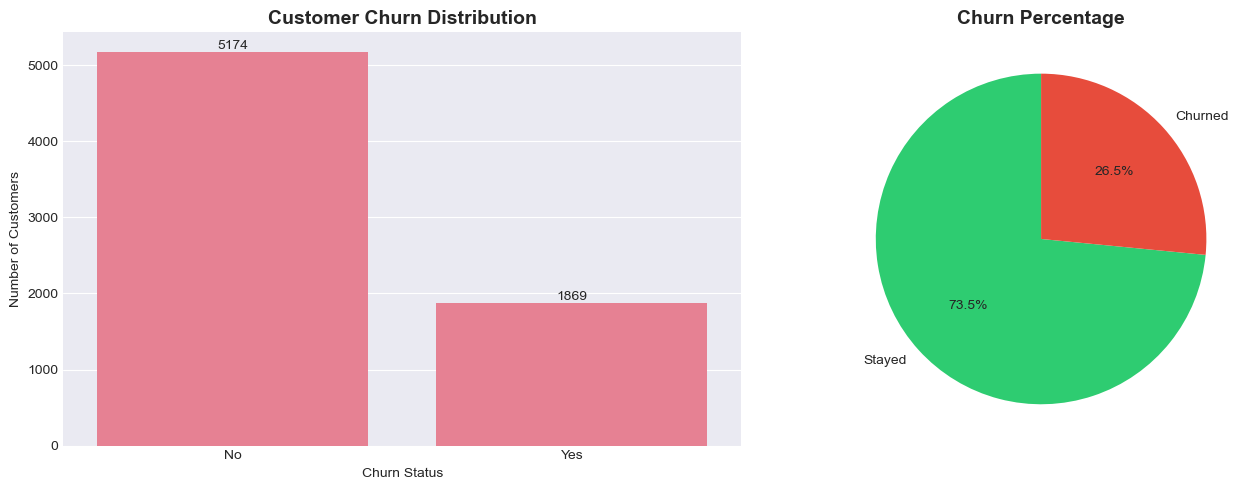

In [16]:
# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts, labels=['Stayed', 'Churned'], autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Churn Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 3. Data Cleaning & Preparation
#### 3.1 Missing Values

In [17]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Missing Values Found:")
    print("="*60)
    print(missing_df)
else:
    print("✓ No missing values found in the dataset!")

✓ No missing values found in the dataset!



### 3.2 Check TotalCharges Data Type Issue


In [18]:
# Check TotalCharges data type
print(f"TotalCharges data type: {df['TotalCharges'].dtype}")
print(f"\nFirst 10 values:")
print(df['TotalCharges'].head(10))

# Try to convert to numeric and see if there are issues
df['TotalCharges_numeric'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check if conversion created any NaN values (meaning non-numeric data existed)
conversion_issues = df['TotalCharges_numeric'].isna().sum()
print(f"\nRows that couldn't convert to numeric: {conversion_issues}")

if conversion_issues > 0:
    print("\nIssue found! Some TotalCharges values are not numeric.")
    print("\nLet's look at the problematic rows:")
    problematic = df[df['TotalCharges_numeric'].isna()]
    print(problematic[['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())

TotalCharges data type: object

First 10 values:
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

Rows that couldn't convert to numeric: 11

Issue found! Some TotalCharges values are not numeric.

Let's look at the problematic rows:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             


In [19]:
# Understanding the issue
print("Analyzing the 11 problematic customers:")
print("="*60)
problematic = df[df['TotalCharges_numeric'].isna()]
print(f"All have tenure = 0: {(problematic['tenure'] == 0).all()}")
print(f"Average MonthlyCharges: ${problematic['MonthlyCharges'].mean():.2f}")
print("\nConclusion: These are brand new customers with no billing history yet.")


Analyzing the 11 problematic customers:
All have tenure = 0: True
Average MonthlyCharges: $41.42

Conclusion: These are brand new customers with no billing history yet.


In [20]:
# Fix: Replace blank TotalCharges with 0
print("\n" + "="*60)
print("Fixing the issue...")


Fixing the issue...


In [21]:
# Create cleaned version
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(0, inplace=True)

In [22]:
print(f"TotalCharges converted to numeric")
print(f"11 blank values filled with 0")
print(f"\nNew TotalCharges data type: {df['TotalCharges'].dtype}")


TotalCharges converted to numeric
11 blank values filled with 0

New TotalCharges data type: float64


In [23]:
# Verify fix
print(f"Remaining missing values in TotalCharges: {df['TotalCharges'].isna().sum()}")

Remaining missing values in TotalCharges: 0


In [24]:
# Let's see all column names and categorize them
print("Dataset Columns:")
print("="*60)
print(f"\nTotal columns: {len(df.columns)}\n")

# Display all columns
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

Dataset Columns:

Total columns: 22

 1. customerID
 2. gender
 3. SeniorCitizen
 4. Partner
 5. Dependents
 6. tenure
 7. PhoneService
 8. MultipleLines
 9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn
22. TotalCharges_numeric


In [25]:
# Remove the duplicate column we created
df.drop('TotalCharges_numeric', axis=1, inplace=True)

print("✓ Removed duplicate TotalCharges_numeric column")
print(f"New column count: {len(df.columns)}\n")

# Now let's categorize our features for better understanding
print("="*60)
print("FEATURE CATEGORIES")
print("="*60)

print("\nCUSTOMER DEMOGRAPHICS (Who is the customer?)")
demographics = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in demographics:
    print(f"  • {col}")

print("\nPHONE SERVICES")
phone = ['PhoneService', 'MultipleLines']
for col in phone:
    print(f"  • {col}")

print("\nINTERNET SERVICES")
internet = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet:
    print(f"  • {col}")

print("\nACCOUNT INFORMATION")
account = ['tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in account:
    print(f"  • {col}")

print("\nBILLING")
billing = ['MonthlyCharges', 'TotalCharges']
for col in billing:
    print(f"  • {col}")

print("\nTARGET VARIABLE (What we're predicting)")
print("  • Churn")

✓ Removed duplicate TotalCharges_numeric column
New column count: 21

FEATURE CATEGORIES

CUSTOMER DEMOGRAPHICS (Who is the customer?)
  • customerID
  • gender
  • SeniorCitizen
  • Partner
  • Dependents

PHONE SERVICES
  • PhoneService
  • MultipleLines

INTERNET SERVICES
  • InternetService
  • OnlineSecurity
  • OnlineBackup
  • DeviceProtection
  • TechSupport
  • StreamingTV
  • StreamingMovies

ACCOUNT INFORMATION
  • tenure
  • Contract
  • PaperlessBilling
  • PaymentMethod

BILLING
  • MonthlyCharges
  • TotalCharges

TARGET VARIABLE (What we're predicting)
  • Churn


In [26]:
# Let's examine a few sample customers to understand the data better
print("SAMPLE CUSTOMERS")
print("="*60)
print("\nShowing 5 random customers:\n")

# Display 5 random rows with all columns
sample = df.sample(5, random_state=42)
print(sample.T)  # Transpose so we see columns as rows (easier to read)

SAMPLE CUSTOMERS

Showing 5 random customers:

                              185                        2715  \
customerID              1024-GUALD                 0484-JPBRU   
gender                      Female                       Male   
SeniorCitizen                    0                          0   
Partner                        Yes                         No   
Dependents                      No                         No   
tenure                           1                         41   
PhoneService                    No                        Yes   
MultipleLines     No phone service                        Yes   
InternetService                DSL                         No   
OnlineSecurity                  No        No internet service   
OnlineBackup                    No        No internet service   
DeviceProtection                No        No internet service   
TechSupport                     No        No internet service   
StreamingTV                     No        N

In [27]:
# Check unique values for categorical columns
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod', 'Churn']

print("UNIQUE VALUES IN CATEGORICAL COLUMNS")
print("="*60)

for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"\n{col}:")
    print(f"  Count: {len(unique_vals)} unique values")
    print(f"  Values: {list(unique_vals)}")

UNIQUE VALUES IN CATEGORICAL COLUMNS

gender:
  Count: 2 unique values
  Values: ['Female', 'Male']

Partner:
  Count: 2 unique values
  Values: ['Yes', 'No']

Dependents:
  Count: 2 unique values
  Values: ['No', 'Yes']

PhoneService:
  Count: 2 unique values
  Values: ['No', 'Yes']

MultipleLines:
  Count: 3 unique values
  Values: ['No phone service', 'No', 'Yes']

InternetService:
  Count: 3 unique values
  Values: ['DSL', 'Fiber optic', 'No']

OnlineSecurity:
  Count: 3 unique values
  Values: ['No', 'Yes', 'No internet service']

OnlineBackup:
  Count: 3 unique values
  Values: ['Yes', 'No', 'No internet service']

DeviceProtection:
  Count: 3 unique values
  Values: ['No', 'Yes', 'No internet service']

TechSupport:
  Count: 3 unique values
  Values: ['No', 'Yes', 'No internet service']

StreamingTV:
  Count: 3 unique values
  Values: ['No', 'Yes', 'No internet service']

StreamingMovies:
  Count: 3 unique values
  Values: ['No', 'Yes', 'No internet service']

Contract:
  Count:

### 4. Bivariate Analysis

#### 4.1 Categorical Features vs Churn

In [28]:
# List of categorical columns excluding customerID and target
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

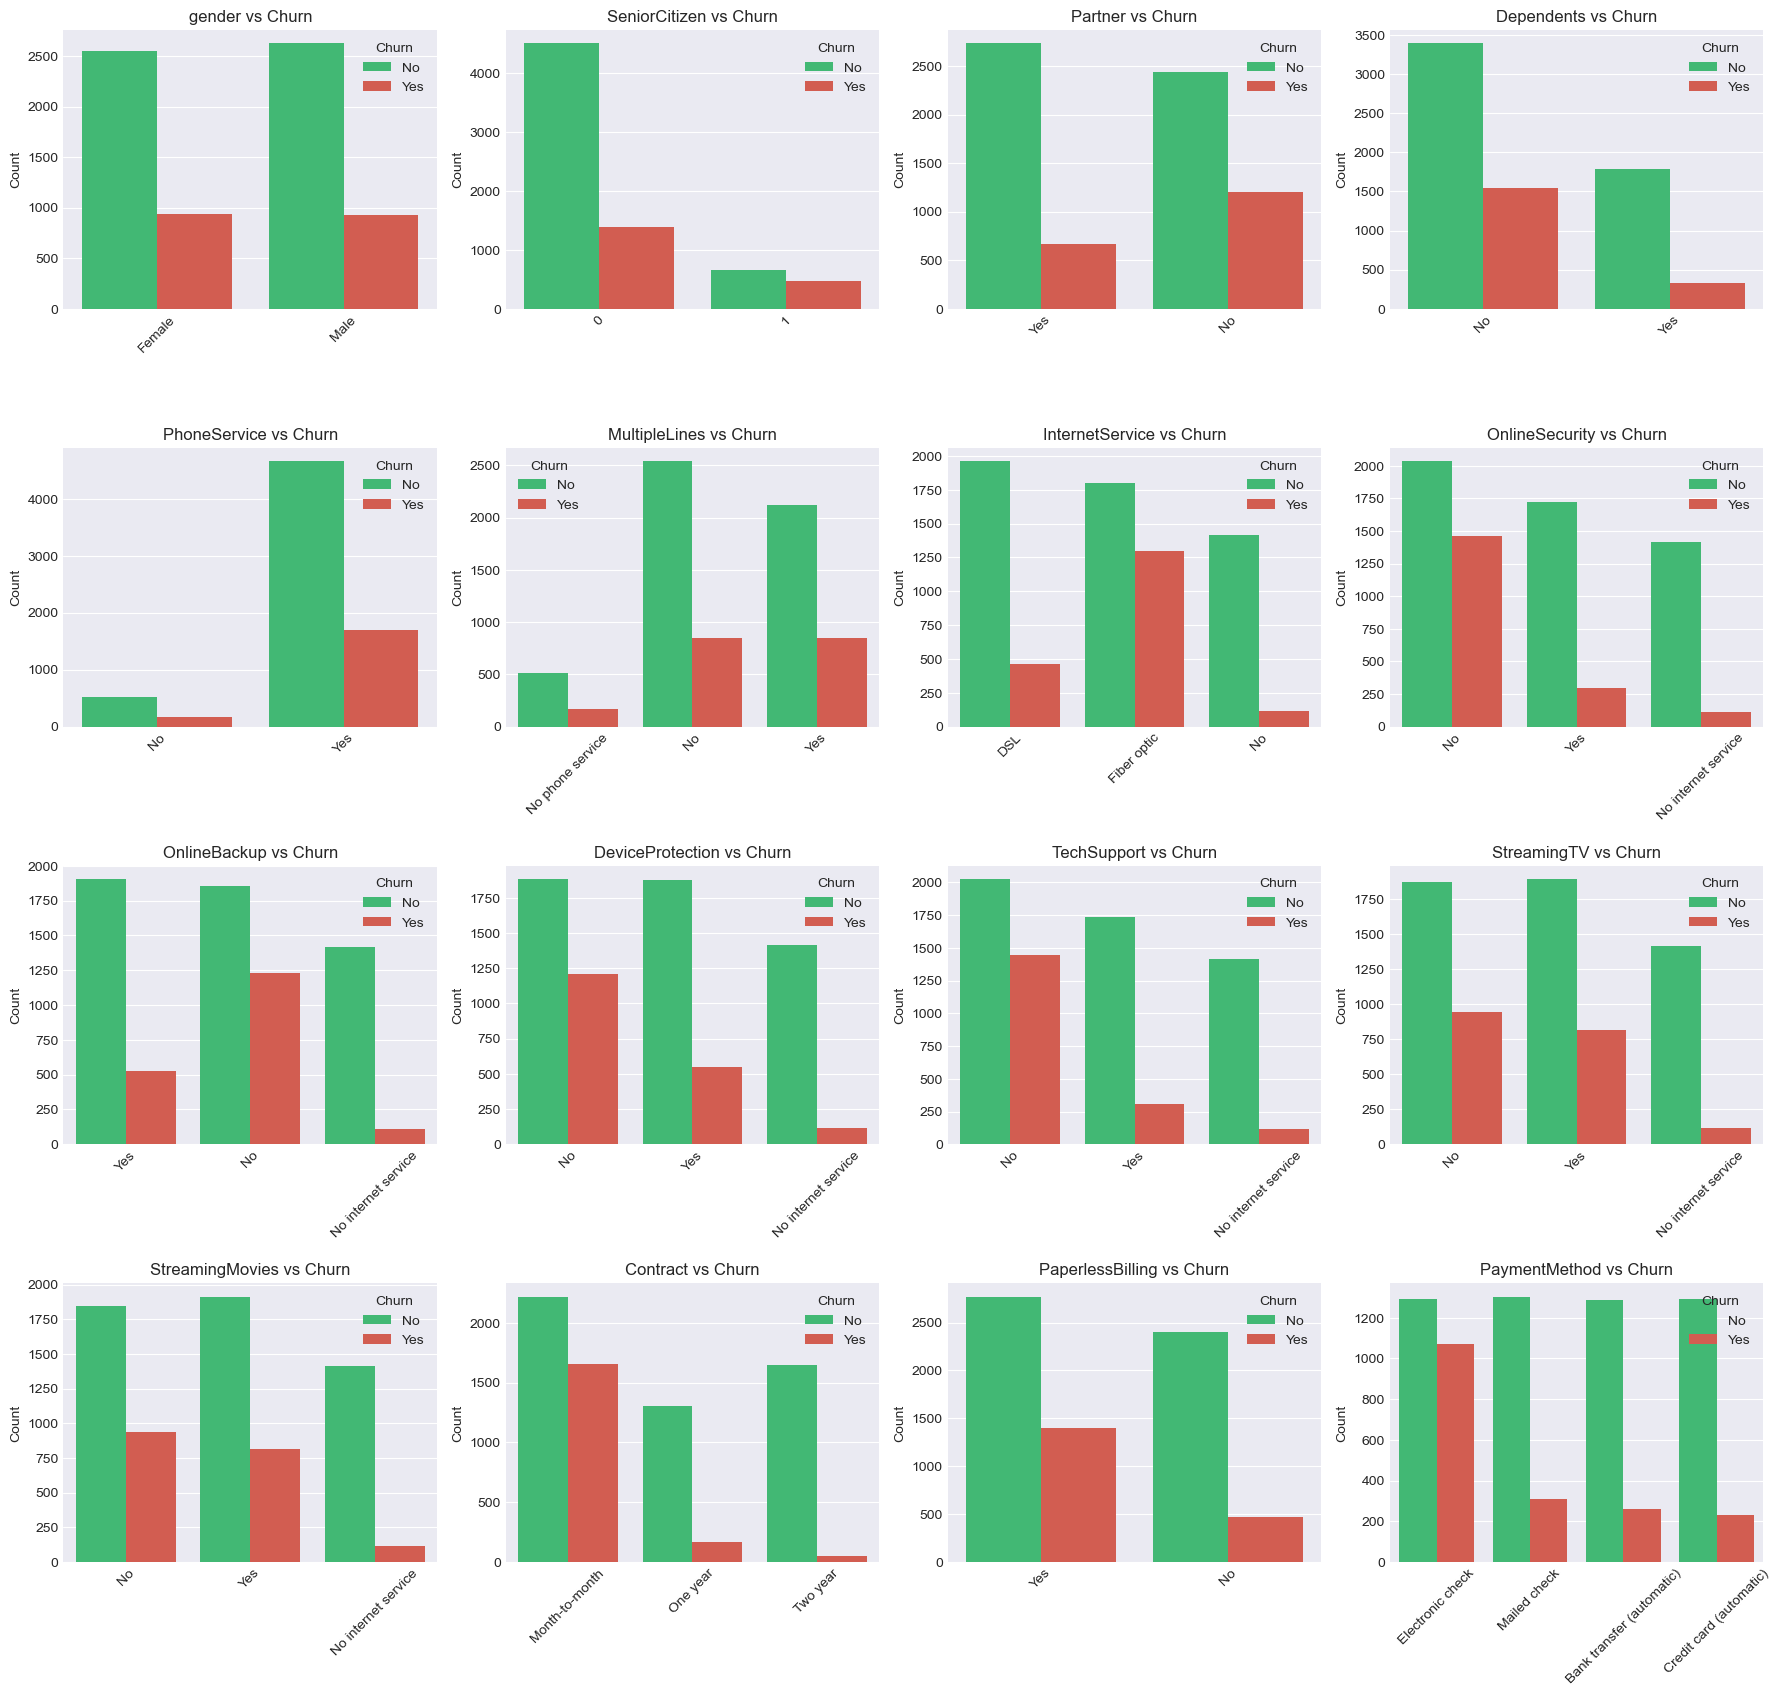

In [31]:
plt.figure(figsize=(18,20))

for i, col in enumerate(categorical_cols,1):
    plt.subplot(5,4,i)
    sns.countplot(x=col, hue='Churn', data=df, palette= ['#2ecc71','#e74c3c'])
    plt.title(f'{col} vs Churn', fontsize= 12)
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

<div style="border:2px solid #2ecc71; padding:15px; border-radius:10px; background-color:#f0f9f5;">
    <h3 style="color:#27ae60;">Categorical Features vs Churn - Summary</h3>
    <ul style="line-height:1.6; font-size:14px;">
        <li><b>High churn risk:</b>
            <ul>
                <li>Month-to-month contract holders (42.7% churn)</li>
                <li>Customers paying via Electronic Check (45.3% churn)</li>
                <li>Fiber optic internet users (41.9% churn)</li>
                <li>Senior citizens, customers without partners or dependents</li>
            </ul>
        </li>
        <li><b>Low churn risk:</b>
            <ul>
                <li>Two-year contracts (2.8% churn)</li>
                <li>Automatic payment methods (~16% churn)</li>
                <li>DSL or no internet customers</li>
            </ul>
        </li>
        <li><b>Insight:</b> Contract type, payment method, and internet service type are the strongest categorical predictors of churn.</li>
    </ul>
</div>


#### 4.2 Numerical Features vs Churn
<div>
    Understand how numeric variables relate to churn — this helps us see patterns that the model can learn.
</div>

**1. Distribution Plots (KDE/ Density)**


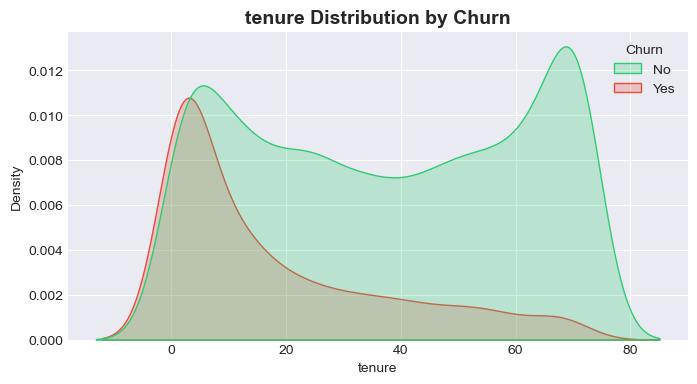

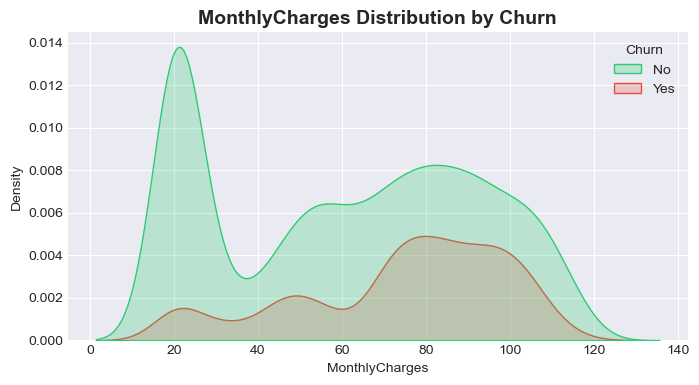

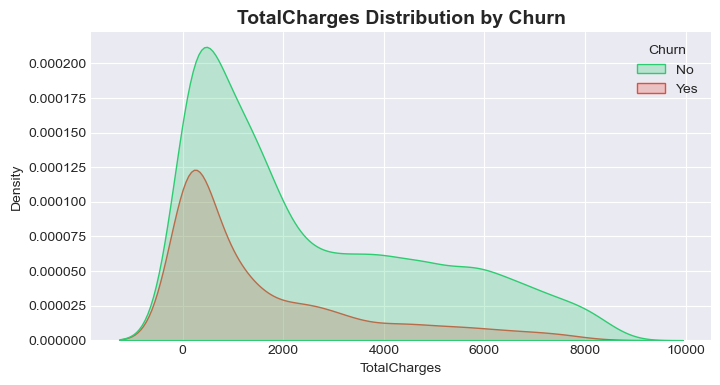

In [33]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True, palette=['#2ecc71','#e74c3c'])
    plt.title(f'{col} Distribution by Churn', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


<div style="border:2px solid #2ecc71; padding:12px; border-radius:8px; background-color:#f0f9f5;">
    <h4 style="color:#27ae60;">Numerical Features vs Churn - Summary</h4>
    <ul style="line-height:1.5; font-size:14px;">
        <li><b>Tenure:</b> Churn is highest for new customers (low tenure).</li>
        <li><b>MonthlyCharges:</b> Customers paying higher bills (75-100) are more likely to churn.</li>
        <li><b>TotalCharges:</b> Churn peaks at low total charges (mostly new customers).</li>
    </ul>
</div>


#### 4.3 Correlation Analysis

**Goal**
- See relationships between numerical features.
- Check which features are positively or negatively correlated with churn.
- Identify redundant features or strong predictors.

**Prepare the Data**

In [34]:
# Encode Churn: No=0, Yes=1
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'No': 0, 'Yes': 1})

# Select numeric columns
numeric_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']


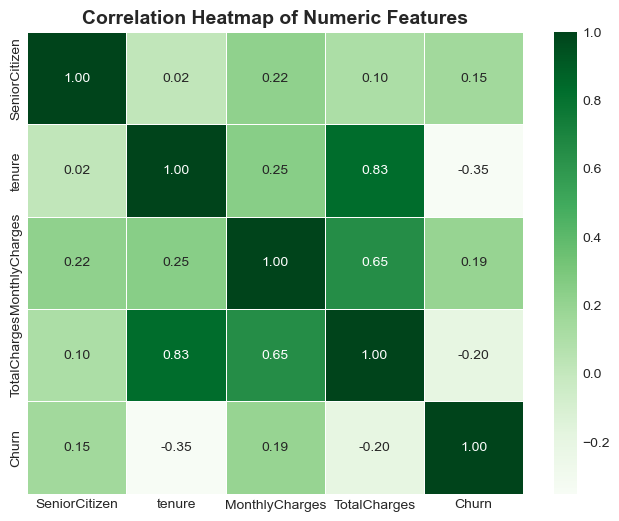

In [35]:
plt.figure(figsize=(8,6))
corr = df_corr[numeric_cols].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='Greens', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14, fontweight='bold')
plt.show()


<div style="border:2px solid #2ecc71; padding:12px; border-radius:8px; background-color:#f0f9f5;">
    <h4 style="color:#27ae60;">Correlation with Churn - Summary</h4>
    <ul style="line-height:1.5; font-size:14px;">
        <li><b>SeniorCitizen (0.15):</b> Slight positive correlation → seniors are somewhat more likely to churn.</li>
        <li><b>Tenure (-0.35):</b> Moderate negative correlation → longer-tenured customers are less likely to churn.</li>
        <li><b>MonthlyCharges (0.19):</b> Weak positive correlation → higher monthly bills slightly increase churn risk.</li>
        <li><b>TotalCharges (-0.20):</b> Weak negative correlation → low total charges (mostly new customers) show higher churn.</li>
    </ul>
</div>


In [36]:
# Define path to save processed data
processed_path = '../data/processed/WA_Fn-UseC_-Telco-Customer-Churn-processed.csv'

# Save the cleaned DataFrame
df.to_csv(processed_path, index=False)

print(f"Processed dataset saved successfully at: {processed_path}")


Processed dataset saved successfully at: ../data/processed/WA_Fn-UseC_-Telco-Customer-Churn-processed.csv
